In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

2023-10-31 09:30:22.626925: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-31 09:30:23.210456: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-31 09:30:23.210600: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-31 09:30:23.213226: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-31 09:30:23.484196: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-31 09:30:23.487520: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [3]:
from tensorflow import keras

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [5]:
(x_train, y_train),(x_test, 
                    y_test) = mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
import matplotlib.pyplot as plt

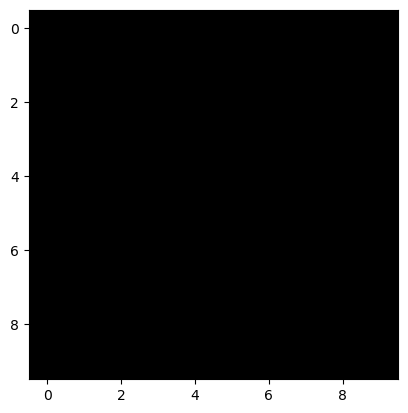

In [9]:
x = np.zeros(100).reshape(10,10)
plt.imshow(x, cmap = 'gray')

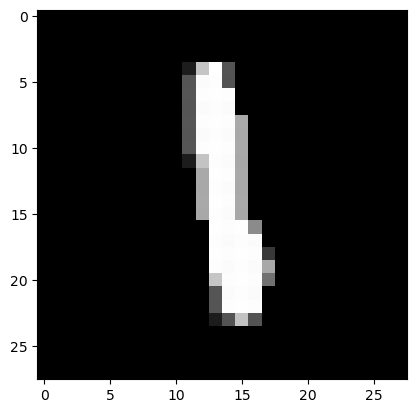

In [10]:
plt.imshow(x_train[200], cmap='gray')

In [11]:
y_train[200]

1

Text(0.5, 1.0, '2')

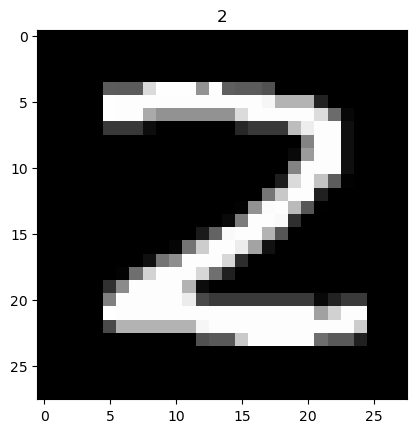

In [12]:
plt.imshow(x_train[220], cmap='gray')
plt.title(y_train[220])

In [13]:
x = np.array([[2,3,5],[8,9,0]])
x

array([[2, 3, 5],
       [8, 9, 0]])

In [14]:
x.shape

(2, 3)

In [15]:
x = x.flatten()
x

array([2, 3, 5, 8, 9, 0])

In [16]:
x.shape

(6,)

In [17]:
img = x_train[3]

In [18]:
img.shape

(28, 28)

In [19]:
img = img.flatten()
img.shape

(784,)

In [20]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [21]:
x_train.shape

(60000, 784)

In [22]:
x = np.array([6,4,2,0,4,5])

In [23]:
x/6

array([1.        , 0.66666667, 0.33333333, 0.        , 0.66666667,
       0.83333333])

In [24]:
# convert the values in between 0 to 1

x_train = x_train/255
x_test = x_test/255

In [25]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [26]:
import seaborn as sns

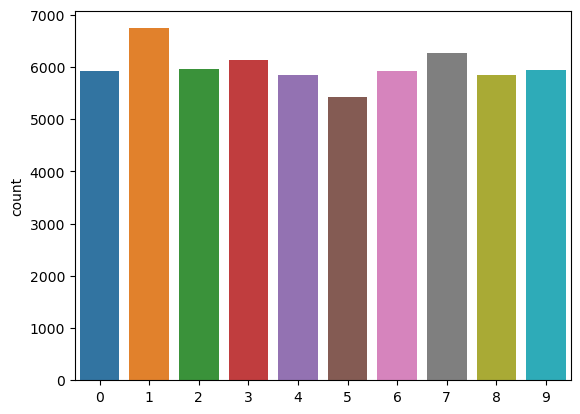

In [29]:
# frequency of a particular image/label
sns.countplot(x = y_train);

In [35]:
from collections import Counter
Counter(y_train)

Counter({1: 6742,
         7: 6265,
         3: 6131,
         2: 5958,
         9: 5949,
         0: 5923,
         6: 5918,
         8: 5851,
         4: 5842,
         5: 5421})

In [36]:
from keras.utils import to_categorical

In [37]:
x = [0,2,2,1,0,2]

In [38]:
to_categorical(x)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [39]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [40]:
y_train.shape

(60000, 10)

In [41]:
y_test.shape

(10000, 10)

# Define the network architecture

In [49]:
# object of neural network
model = Sequential()

# input layer
model.add(Dense(784, input_shape=(784,), 
               activation='relu'))

# hidden layer -1
model.add(Dense(256, activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 784)               615440    
                                                                 
 dense_7 (Dense)             (None, 256)               200960    
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 818970 (3.12 MB)
Trainable params: 818970 (3.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile the model

In [51]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics= ['accuracy'])

# Train the model

In [52]:
history = model.fit(x_train, y_train, epochs = 10,
                   batch_size= 10)

Epoch 1/10
6000/6000 [==============================] - 47s 8ms/step - loss: 0.1848 - accuracy: 0.9433
Epoch 2/10
6000/6000 [==============================] - 46s 8ms/step - loss: 0.0886 - accuracy: 0.9735
Epoch 3/10
6000/6000 [==============================] - 47s 8ms/step - loss: 0.0665 - accuracy: 0.9797
Epoch 4/10
6000/6000 [==============================] - 48s 8ms/step - loss: 0.0525 - accuracy: 0.9847
Epoch 5/10
6000/6000 [==============================] - 46s 8ms/step - loss: 0.0459 - accuracy: 0.9871
Epoch 6/10
6000/6000 [==============================] - 47s 8ms/step - loss: 0.0395 - accuracy: 0.9881
Epoch 7/10
6000/6000 [==============================] - 46s 8ms/step - loss: 0.0369 - accuracy: 0.9895
Epoch 8/10
6000/6000 [==============================] - 46s 8ms/step - loss: 0.0346 - accuracy: 0.9906
Epoch 9/10
6000/6000 [==============================] - 47s 8ms/step - loss: 0.0284 - accuracy: 0.9922
Epoch 10/10
6000/6000 [==============================] - 47s 8ms/step - l

In [53]:
history.history

{'loss': [0.18476471304893494,
  0.08862417191267014,
  0.06646620482206345,
  0.052533555775880814,
  0.04589745029807091,
  0.03948664665222168,
  0.03692496195435524,
  0.034564319998025894,
  0.028363127261400223,
  0.03171229735016823],
 'accuracy': [0.9432666897773743,
  0.973466694355011,
  0.9797000288963318,
  0.9847333431243896,
  0.9871333241462708,
  0.9881333112716675,
  0.9894833564758301,
  0.9905666708946228,
  0.9921666383743286,
  0.9919833540916443]}

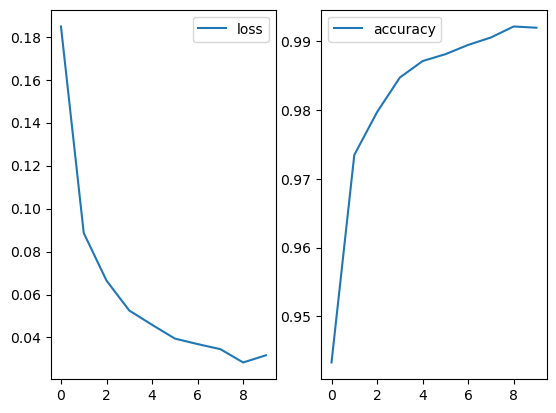

In [54]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()

In [55]:
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 15s 2ms/step - loss: 0.1331 - accuracy: 0.9807


[0.1331114023923874, 0.9807000160217285]